# House Prices Advanced Regression Techniques

## Seminarski rad na kursu Masinsko ucenje - Matematicki fakultet, Univerzitet u Beogradu
 
### Autor: Denis Alicic
 

### Skup podataka: [link](https://www.kaggle.com/c/house-prices-advanced-regression-techniques)

### Detaljni opis podataka je dostupan u [fajlu](../Dataset/data_description.txt)

## Preprocesiranje podataka

In [152]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb

In [153]:
# Ucitavanje podataka
train = pd.read_csv("../Dataset/train.csv")
test = pd.read_csv("../Dataset/test.csv")

In [154]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [155]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [156]:
# Osnovne statistike
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [157]:
# Odmah vidimo da postoji Id, koji nam nece trebati
# Kao i da postoje kolone koje sadrze dosta NaN i 0 vrednosti, pa hajde da to malo istrazimo o cemu se radi
train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)

In [158]:
# Dalje cemo sve statistike i istrazivanje vrsiti nad train podacima
# I evenetualna skaliranja i odbacivanja raditi nad oba "naucena" na train
nedostajuce_vrednost = (train.isnull().sum() / len(train)) * 100
nedostajuce_vrednost = nedostajuce_vrednost.drop(nedostajuce_vrednost[nedostajuce_vrednost == 0].index).sort_values(ascending=False)[:30]
nedostajuce_vrednost_pd = pd.DataFrame({'Missing Ratio' :nedostajuce_vrednost})
nedostajuce_vrednost_pd

,Missing Ratio
PoolQC,99.520548
MiscFeature,96.301370
Alley,93.767123
Fence,80.753425
FireplaceQu,47.260274
LotFrontage,17.739726
GarageYrBlt,5.547945
GarageType,5.547945
GarageFinish,5.547945
GarageQual,5.547945


Text(0.5, 1.0, 'Procenat nedostajucih vrednosti po atributu')

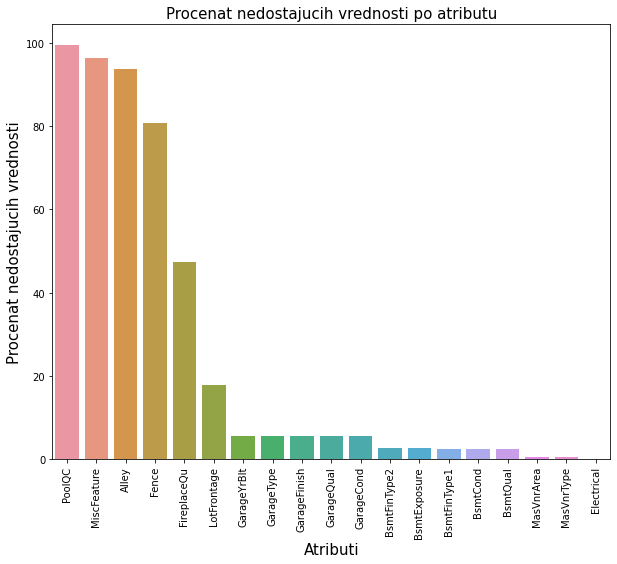

In [159]:
f, ax = plt.subplots(figsize=(10,8))
plt.xticks(rotation='90')
sb.barplot(x=nedostajuce_vrednost.index, y=nedostajuce_vrednost)
plt.xlabel('Atributi', fontsize=15)
plt.ylabel('Procenat nedostajucih vrednosti', fontsize=15)
plt.title('Procenat nedostajucih vrednosti po atributu', fontsize=15)

In [160]:
numericki = [f for f in train.columns if train.dtypes[f] != 'object']
kategoricki = [f for f in train.columns if train.dtypes[f] == 'object']

In [161]:
numericki

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb1ce456790>,
      dtype=object)

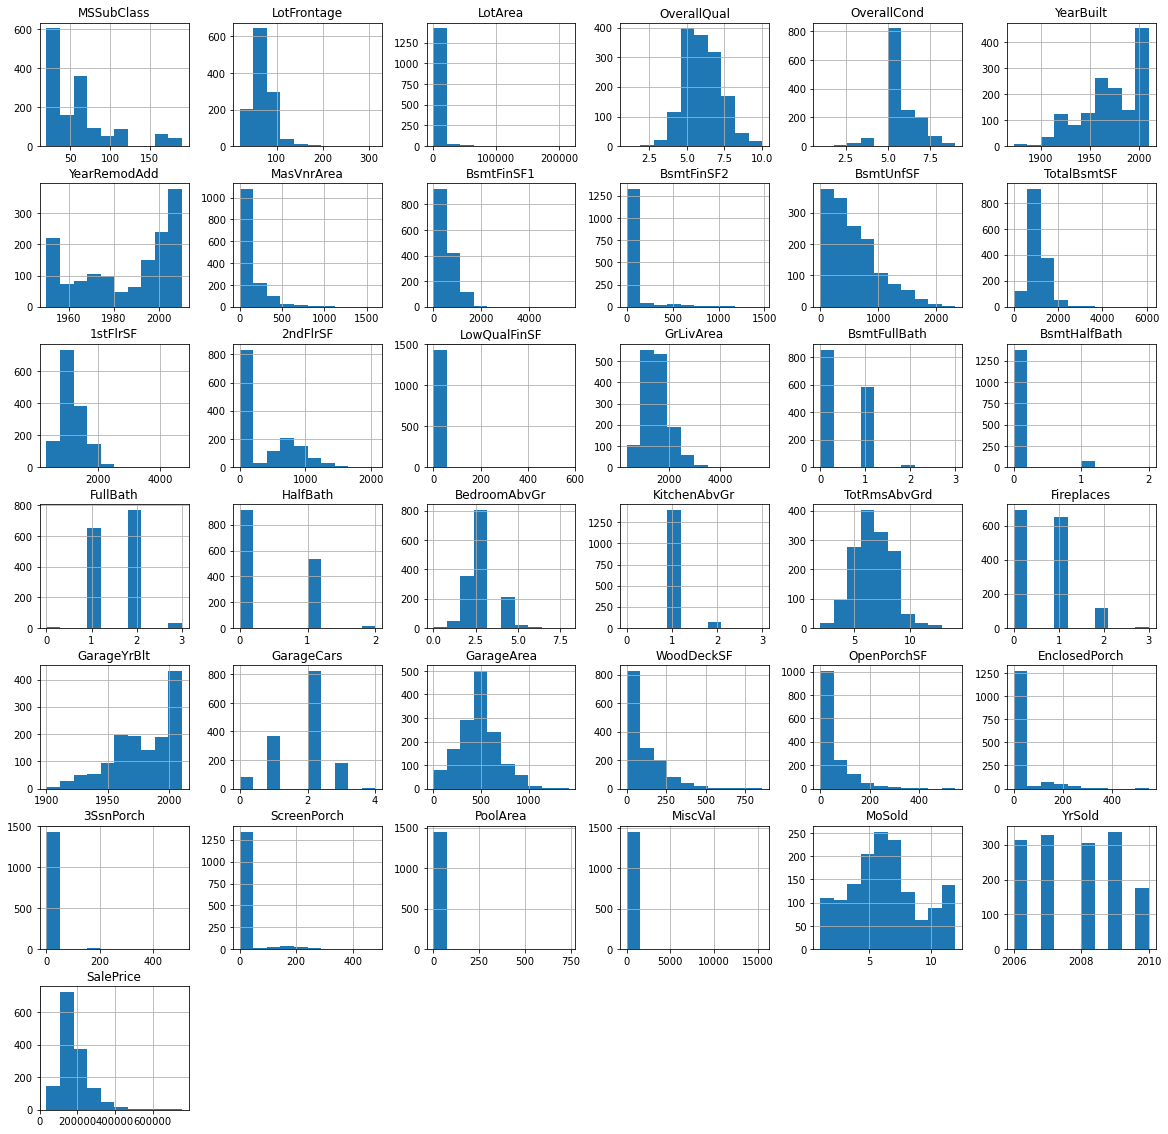

In [162]:
#Skoro ni jedan ne prati normalnu raspodelu, moracemo da vrsimo neke korekcije
train[numericki].hist(figsize=(20, 20))

<ipython-input-163-0b3df6122c13>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


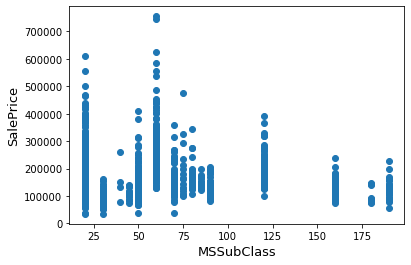

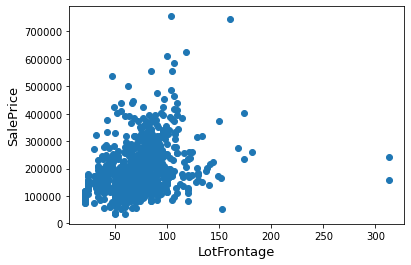

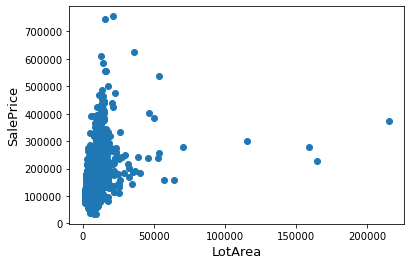

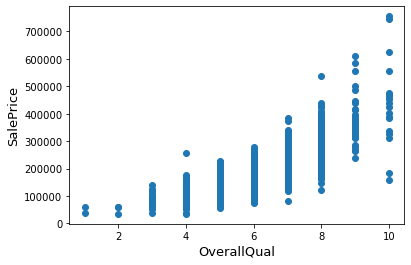

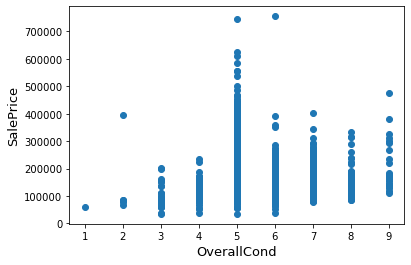

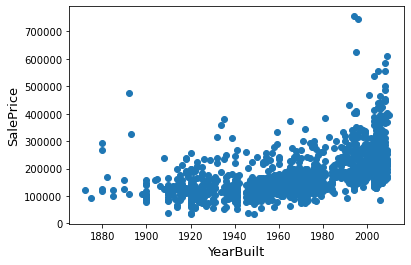

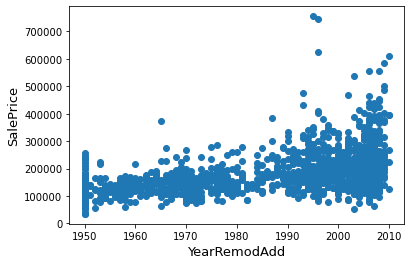

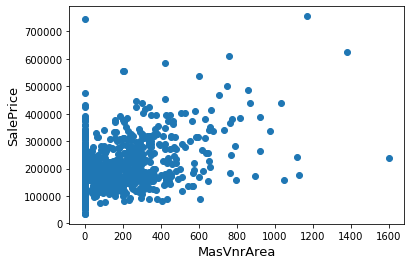

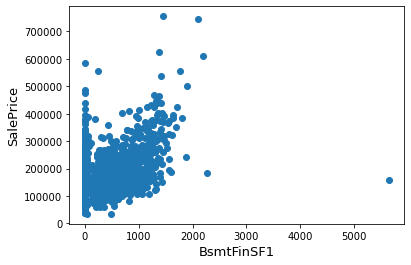

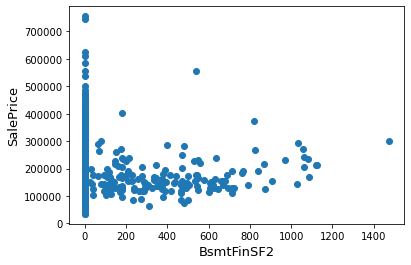

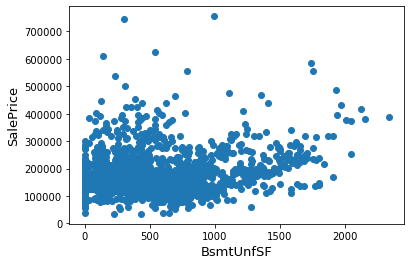

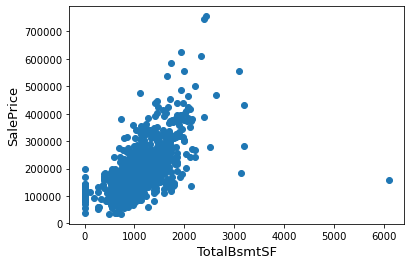

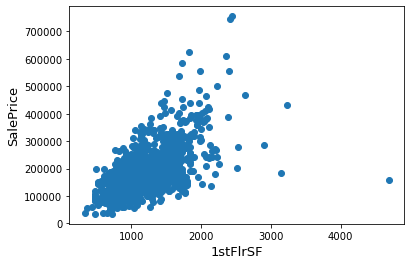

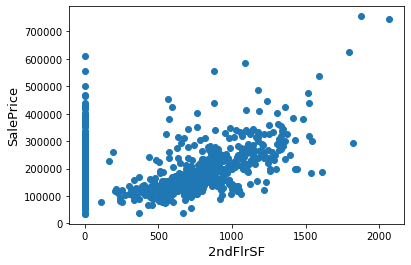

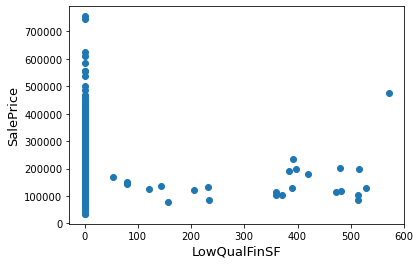

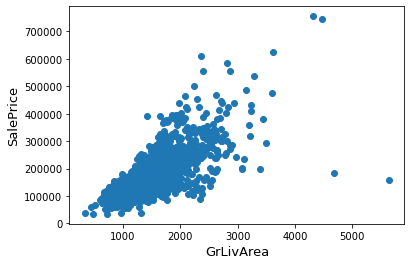

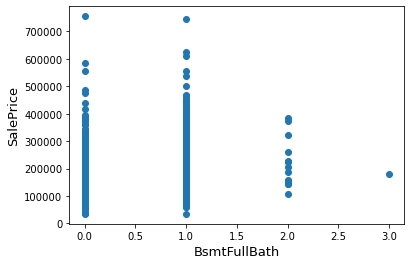

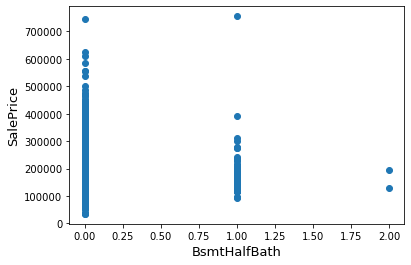

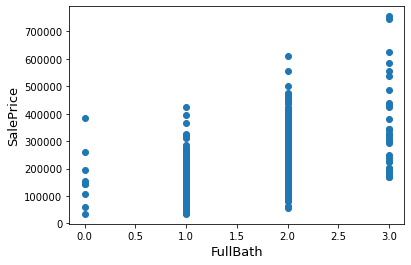

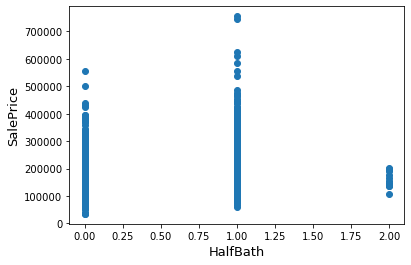

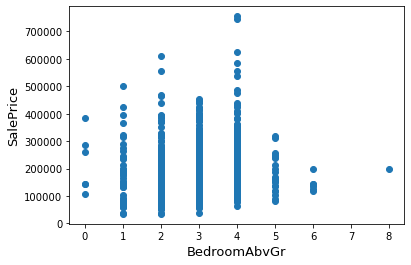

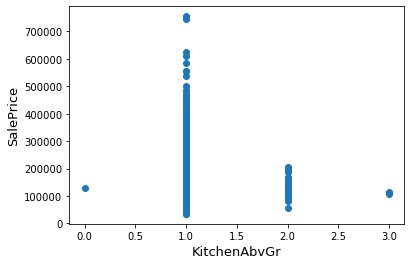

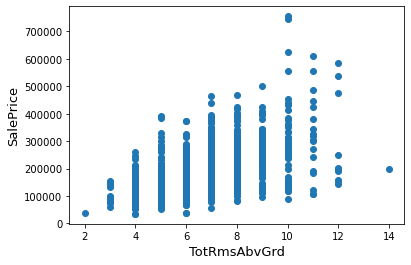

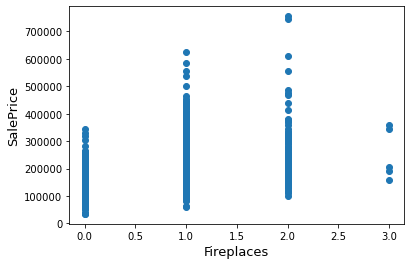

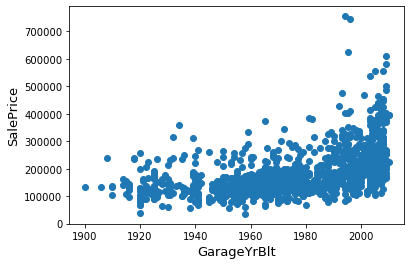

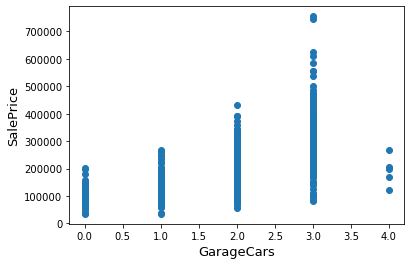

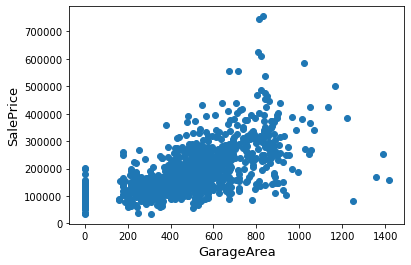

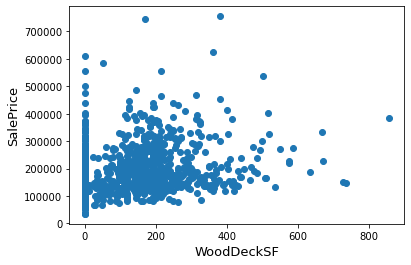

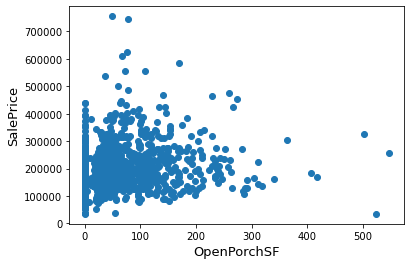

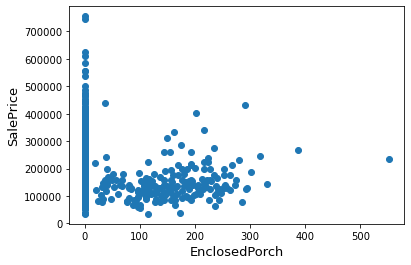

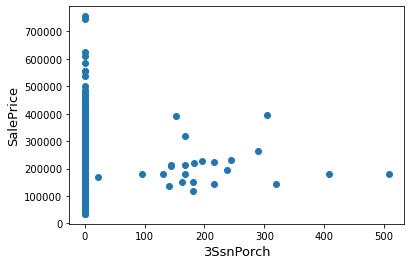

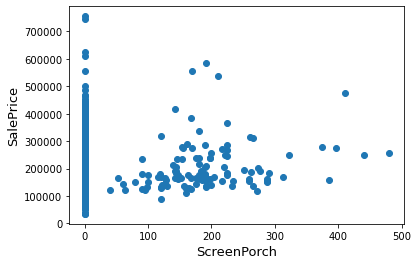

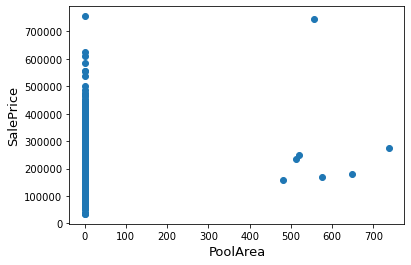

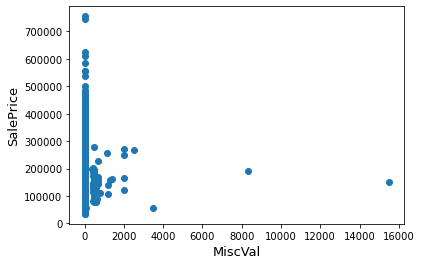

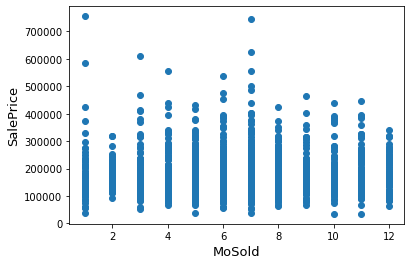

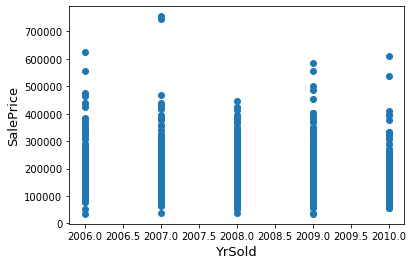

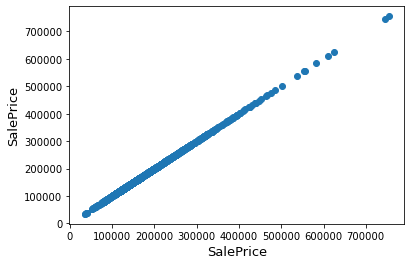

In [163]:
# Detekcija korelacije i outlajera
for n in numericki:
    fig, ax = plt.subplots()
    ax.scatter(x = train[n], y = train['SalePrice'])
    plt.ylabel('SalePrice', fontsize=13)
    plt.xlabel(n, fontsize=13)
plt.show()

In [164]:
# Podataka nema mnogo pa cemo ih rucno okloniti i analizirati
print(train.shape)
train = train.drop(train[train['LotFrontage']>300].index)
train = train.drop(train[train['LotArea']>200000].index)
train = train.drop(train[train['BsmtFinSF1']>5000].index)
train = train.drop(train[train['1stFlrSF']>4000].index)
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)
train = train.drop(train[train['OpenPorchSF']>500].index)
train = train.drop(train[train['WoodDeckSF']>800].index)
train = train.drop(train[train['EnclosedPorch']>500].index)
train = train.drop(train[train['3SsnPorch']>400].index)
train = train.drop(train[train['MiscVal']>8000].index)
print(train.shape)


(1460, 80)
(1447, 80)


<ipython-input-165-0b3df6122c13>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


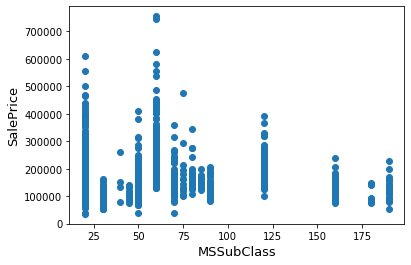

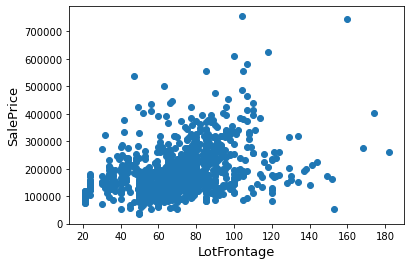

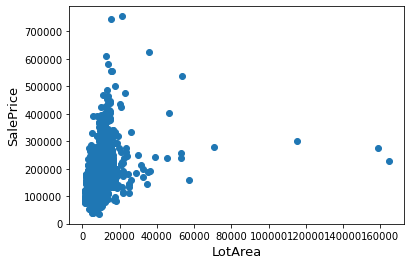

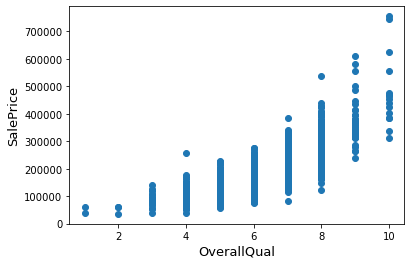

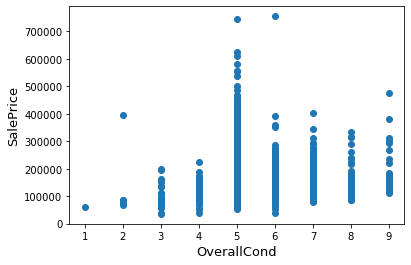

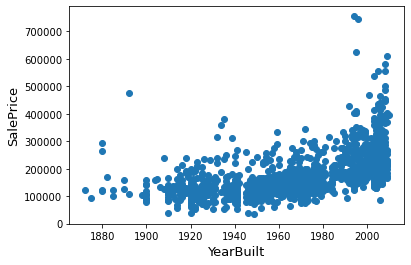

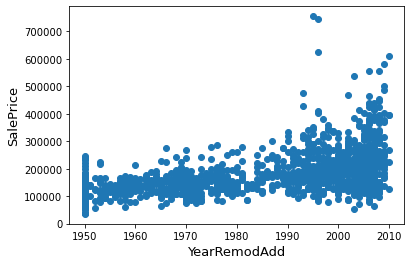

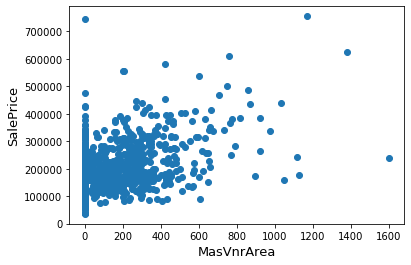

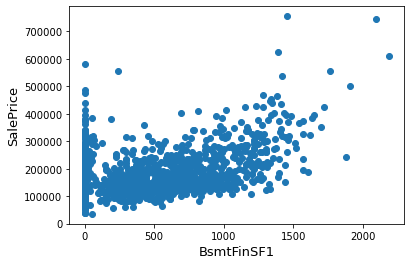

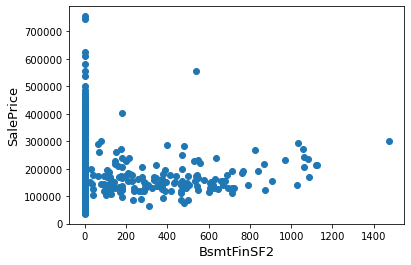

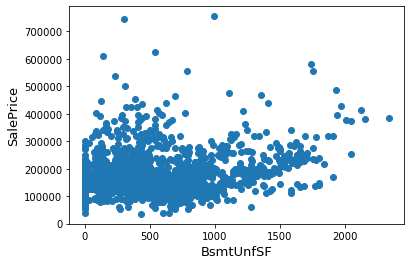

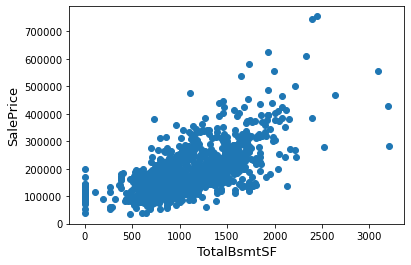

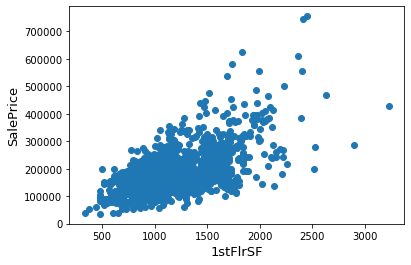

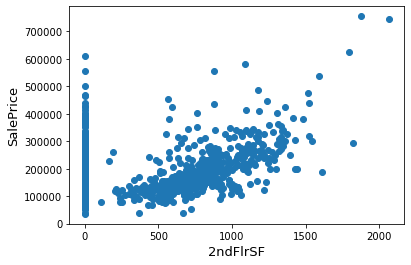

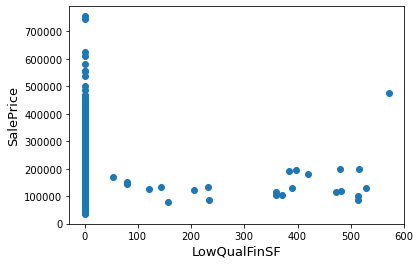

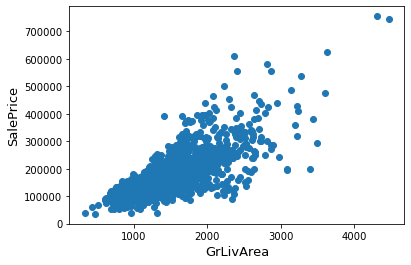

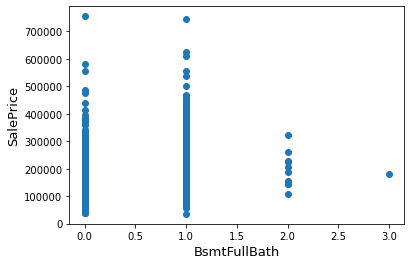

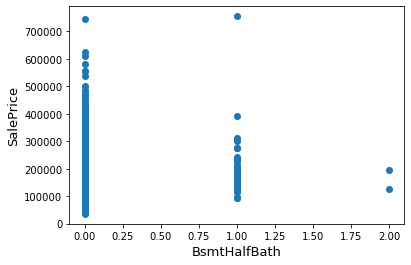

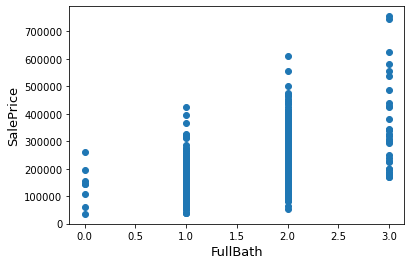

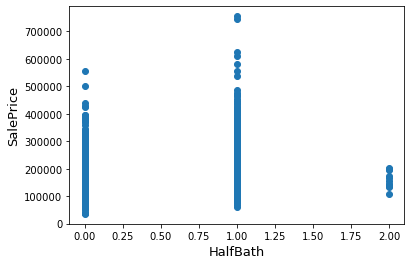

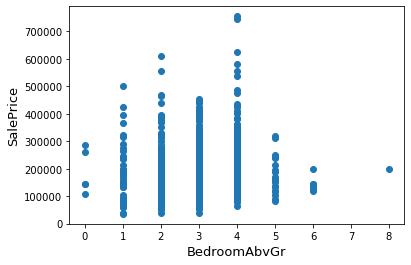

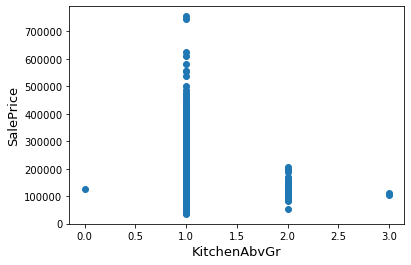

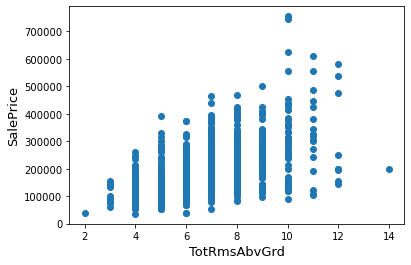

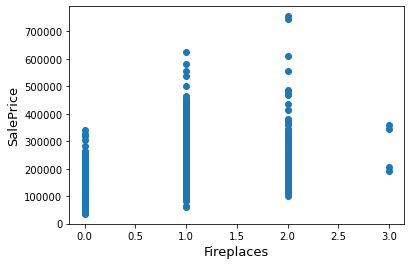

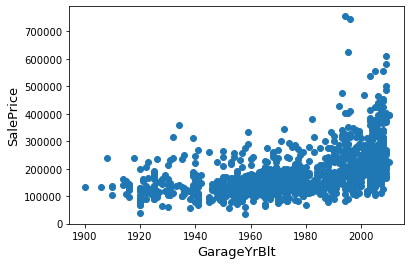

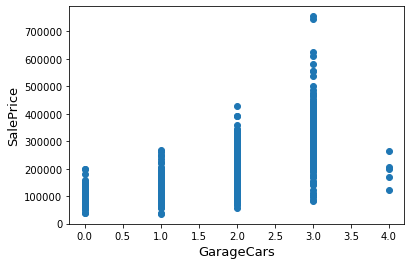

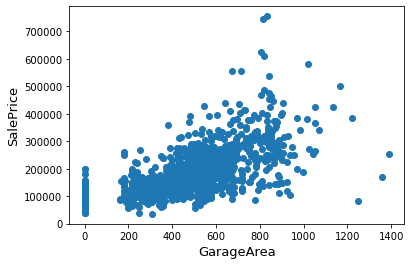

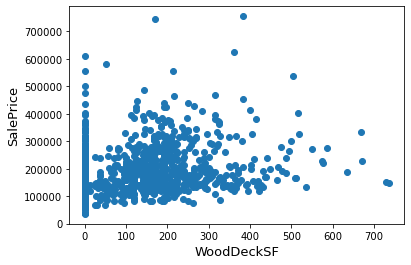

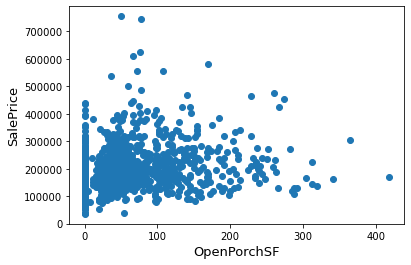

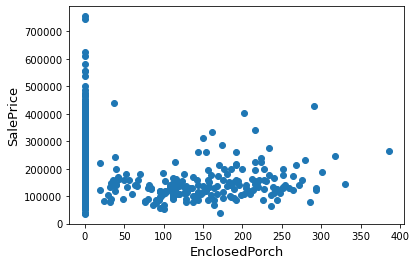

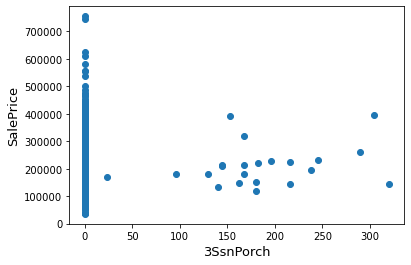

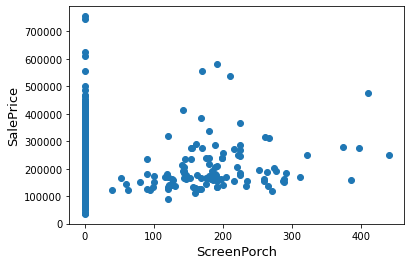

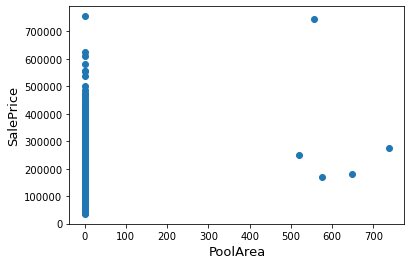

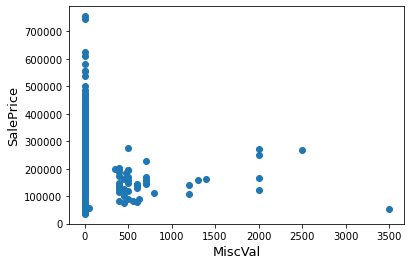

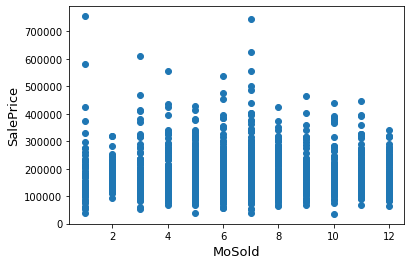

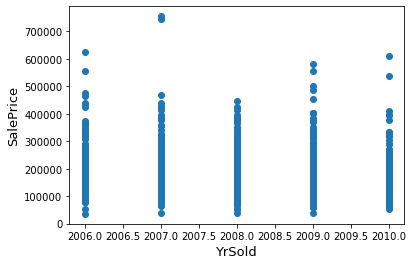

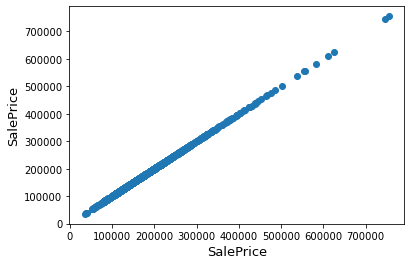